In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv("Obesity.csv")
classes = data['Label'].unique()
classes

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [3]:
# ID column is not relevant
Data = data.drop('ID',axis=1)

# Show the first seven rows
print(Data.head(7))
print("-"*100)

# Show some statistics
print(Data.describe())

   Age  Gender  Height  Weight   BMI          Label
0   25    Male     175      80  25.3  Normal Weight
1   30  Female     160      60  22.5  Normal Weight
2   35    Male     180      90  27.3     Overweight
3   40  Female     150      50  20.0    Underweight
4   45    Male     190     100  31.2          Obese
5   50  Female     140      40  16.7    Underweight
6   55    Male     200     110  34.2          Obese
----------------------------------------------------------------------------------------------------
              Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000
mean    46.555556  166.574074   59.490741   20.549074
std     24.720620   27.873615   28.856233    7.583818
min     11.000000  120.000000   10.000000    3.900000
25%     27.000000  140.000000   35.000000   16.700000
50%     42.500000  175.000000   55.000000   21.200000
75%     59.250000  190.000000   85.000000   26.100000
max    112.000000  210.000000  120.000000   37.2000

In [4]:
# Check if there are any missing values
Data.isnull().sum() 

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [5]:
# LABEL ENCODING
encoder = LabelEncoder()
Data['Gender'] = np.where(Data['Gender'] == 'Male',1,0)
Data['Label'] = encoder.fit_transform(Data['Label'])
Data.head(3)

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2


<Axes: >

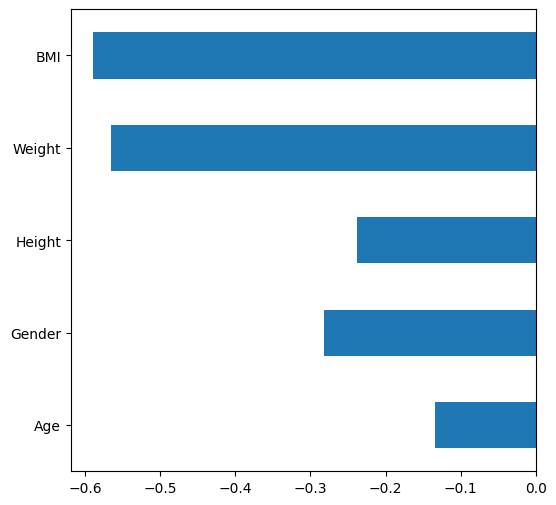

In [6]:
# Correlation 
corr_values = Data.corr()['Label'].drop('Label')
corr_values.plot(kind='barh', figsize=(6, 6))

In [7]:
# SAVE FINAL DATA
Data.to_csv("obesity_modified.csv",index=False)

In [9]:
print("Classes:", encoder.classes_) 


Classes: ['Normal Weight' 'Obese' 'Overweight' 'Underweight']


This means:
- Normal Weight --> 0
- Obese ---> 1
- Overweight ---> 2
- Underweight ---> 3